## Linear Regression for Si-Calibration using 228Th Alpha Lines

In [1]:
import pandas as pd
import numpy as np
import uproot3 as uproot
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Opening the fitted calibration file as training data

In [2]:
df_train = pd.read_csv("InputFile/SiCalibration.csv")

dummy = pd.DataFrame()
dummy['RingNumber'] = np.arange(32)
dummy = dummy.loc[dummy.index.repeat(5)].reset_index(drop=True)

df_train = pd.concat([dummy, df_train], axis=1)
df_train.head()

,RingNumber,ADC,Energy
0,0,1757.42,5.42308
1,0,1838.10,5.68537
2,0,2024.71,6.28800
3,0,2176.67,6.77830
4,0,2797.00,8.78412


### Regression Model

In [3]:
# Linear Reg Model
RegMo = linear_model.LinearRegression()

### One Hot Encoder 

In [4]:
# Using One Hot Encoder to convert the categorical variable (Ring Number)
ct = ColumnTransformer([('RingNumber', OneHotEncoder(), [0])], remainder = 'passthrough')

X_train = df_train.iloc[:,:2]
Y_train = df_train.iloc[:,2:]
X_train = ct.fit_transform(X_train)

RegMo.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Opening an alpha run root file to test the model with real data


In [5]:
InputFile = uproot.open("InputFile/CalData.root")
InputFile.keys()
InputTree=InputFile["DataTree"]
InputTree.keys()
InputTree.arrays(["RingNum","ADCValue"])
df_test = InputTree.pandas.df(["RingNum*","ADCValue*"])
df_test = df_test[df_test['ADCValue'] >= 1200]

### One Hot Encoder

In [6]:
# Using One Hot Encoder to convert the categorical variable (Ring Number)
ct = ColumnTransformer([('RingNum', OneHotEncoder(), [0])], remainder = 'passthrough')
X_test = df_test
X_test = ct.fit_transform(X_test)
df_test['EnergyPredicted'] = RegMo.predict(X_test)

Text(0.5, 1.0, 'After Calibration')

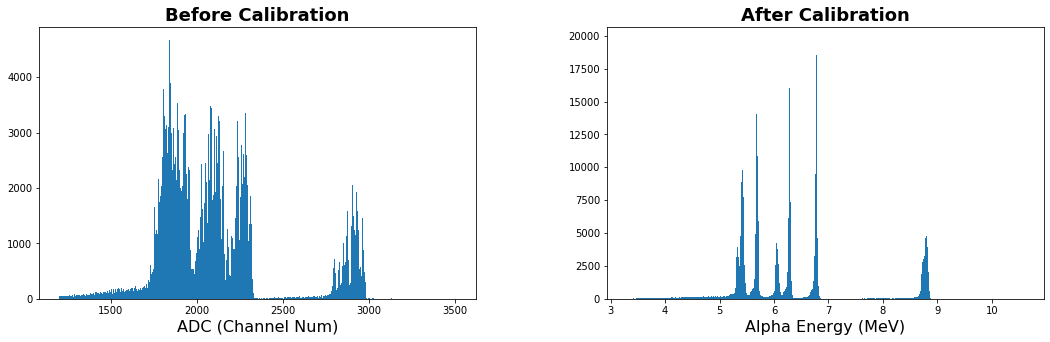

In [7]:
#Plotting Histograms
hist = df_test[['ADCValue','EnergyPredicted']].hist(bins=500, figsize = (18,5), grid=False)
hist[0][0].set_xlabel("ADC (Channel Num)",fontsize=16)
hist[0][1].set_xlabel("Alpha Energy (MeV)",fontsize=16)
hist[0][0].set_title("Before Calibration",fontsize=18,fontweight="bold")
hist[0][1].set_title("After Calibration",fontsize=18,fontweight="bold")